# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Table of Content

<ol>
    <li><h3><a href="#introduction">Introduction</a></h3></li>
    <li><h3><a href="#research">Research Questions</a></h3></li>
    <li><h3><a href="#data">Data</a></h3></li>
    <li><h3><a href="#inference">Inferences</a></h3></li>
    <li><h3><a href="#results">Results and Discussion</a></h3></li>
    <li><h3><a href="#conclusion">Conclusion</a></h3></li>    

</ol>

# Introduction

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro.

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [57]:
import json
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import patheffects
import matplotlib.gridspec as gridspec

# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Geo
import geopandas as gpd

# Stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import seaborn as sns

## Prepare Data

Reading the dataset:

In [58]:
df_origin = pd.read_excel('C:\\Users\\Patyc\\OneDrive\\Desktop\\Universidade\\Mestrado FEUP\\Fundamentals of Engineering and Data Science\\Statistics\\Project\\Dataset.xlsx')
df_origin.head(10)

,Trimestre,Distrito,Concelho,Freguesia,Código Postal,Tipo de Tecnologia,Nível de Tensão,Escalão de potência instalada (kW),Número de instalacões,Potência Total Instalada UPAC (kW),Código Distrito,Código Concelho,Código Freguesia,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,BTE,"]30, 1000]",1,40.0,3,312,031234,57414,0.000017,0.000697
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,MT,"]30, 1000]",3,463.0,3,312,031234,57414,0.000052,0.008064
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),4765,Solar,MT,"]30, 1000]",2,169.6,3,312,031239,57414,0.000035,0.002954
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),4770,Solar,MT,"]30, 1000]",1,136.0,3,312,031241,57414,0.000017,0.002369
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),4765,Solar,MT,"]30, 1000]",2,1720.0,3,312,031242,57414,0.000035,0.029958
5,2024T3,Braga,Vila Nova de Famalicão,Avidos e Lagoa,4770,Solar,MT,"]30, 1000]",2,1008.0,3,312,031252,57414,0.000035,0.017557
6,2024T3,Braga,Vila Nova de Famalicão,Esmeriz e Cabeçudos,4760,Solar,BTE,"]30, 1000]",1,50.0,3,312,031254,57414,0.000017,0.000871
7,2024T3,Braga,Vila Nova de Famalicão,"Gondifelos, Cavalões e Outiz",4760,Solar,MT,"]30, 1000]",1,60.0,3,312,031255,57414,0.000017,0.001045
8,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",4770,Solar,MT,"]30, 1000]",3,360.5,3,312,031256,57414,0.000052,0.006279
9,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",4775,Solar,MT,"]30, 1000]",1,53.0,3,312,031256,57414,0.000017,0.000923


Rename all columns to English

In [59]:
df_origin.rename(columns={
    "Trimestre": "Quarter",
    "Distrito": "District",
    "Concelho": "Municipality",
    "Freguesia": "Parish",
    "Código Postal": "Postal Code",
    "Tipo de Tecnologia": "Technology Type",
    "Nível de Tensão": "Voltage level",
    "Escalão de potência instalada (kW)": "Installed power range (kW)",
    "Número de instalacões": "Number of installations",
    "Potência Total Instalada UPAC (kW)": "Total installed power (kW)",
    "Código Distrito": "District Code",
    "Código Concelho": "Municipality Code",
    "Código Freguesia": "Parish Code",
    "CPEs (#)": "CPEs (#)",
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
}, inplace=True)

df_origin.columns

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Postal Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)',
       'District Code', 'Municipality Code', 'Parish Code', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')

Dataset info

In [60]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Quarter                      121294 non-null  object 
 1   District                     121294 non-null  object 
 2   Municipality                 121294 non-null  object 
 3   Parish                       121294 non-null  object 
 4   Postal Code                  121294 non-null  int64  
 5   Technology Type              121283 non-null  object 
 6   Voltage level                121292 non-null  object 
 7   Installed power range (kW)   121294 non-null  object 
 8   Number of installations      121294 non-null  int64  
 9   Total installed power (kW)   121294 non-null  float64
 10  District Code                121294 non-null  int64  
 11  Municipality Code            121294 non-null  int64  
 12  Parish Code                  121294 non-nul

Non-Numeric Columns

In [61]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2024T3', '2024T4', '2024T2', '2023T2', '2023T3', '2022T4', '2023T1', '2025T1', '2025T2', '2023T4', '2024T1']
----------------------------------------
Column: District — 18 unique values
['Braga', 'Faro', 'Guarda', 'Leiria', 'Bragança', 'Castelo Branco', 'Coimbra', 'Évora', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja']
----------------------------------------
Column: Municipality — 278 unique values
['Vila Nova de Famalicão', 'Lagoa', 'Loulé', 'Portimão', 'Silves', 'Tavira', 'Vila do Bispo', 'Vila Real de Santo António', 'Aguiar da Beira', 'Almeida', 'Guarda', 'Pinhel', 'Sabugal', 'Seia', 'Trancoso', 'Vila Nova de Foz Côa', 'Alcobaça', 'Vila Verde', 'Vizela', 'Alfândega da Fé', 'Bragança', 'Macedo de Cavaleiros', 'Mirandela', 'Mogadouro', 'Vila Flor', 'Vinhais', 'Castelo Branco', 'Covilhã', 'Fundão', 'Idanha-a-Nova', 'Oleiros', 'Penamacor', 'Proença-a-Nova', 'Sertã', 'Vila de Rei',

Translation Dictionary Technology Type

In [62]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Wind' 'Biogas' 'Not Assigned' 'Hydro' nan 'Biomass'
 'Non-renewable Cogeneration' 'Photovoltaic']


### Data Selection

Removing unnecessary columns

In [63]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,BTE,"]30, 1000]",1,40.0,57414,0.000017,0.000697
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,MT,"]30, 1000]",3,463.0,57414,0.000052,0.008064
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),Solar,MT,"]30, 1000]",2,169.6,57414,0.000035,0.002954
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),Solar,MT,"]30, 1000]",1,136.0,57414,0.000017,0.002369
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),Solar,MT,"]30, 1000]",2,1720.0,57414,0.000035,0.029958
5,2024T3,Braga,Vila Nova de Famalicão,Avidos e Lagoa,Solar,MT,"]30, 1000]",2,1008.0,57414,0.000035,0.017557
6,2024T3,Braga,Vila Nova de Famalicão,Esmeriz e Cabeçudos,Solar,BTE,"]30, 1000]",1,50.0,57414,0.000017,0.000871
7,2024T3,Braga,Vila Nova de Famalicão,"Gondifelos, Cavalões e Outiz",Solar,MT,"]30, 1000]",1,60.0,57414,0.000017,0.001045
8,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",3,360.5,57414,0.000052,0.006279
9,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",1,53.0,57414,0.000017,0.000923


Selecting years of interest

In [64]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values

In [65]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.002259


In [66]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows

In [67]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
8729    2023T2     Braga            Guimarães   
22980   2024T1    Lisboa               Lisboa   
47870   2024T2     Braga             Barcelos   
50736   2024T3  Santarém  Salvaterra de Magos   
51246   2024T3    Lisboa               Lisboa   
52281   2024T3    Lisboa              Amadora   
53425   2024T4    Lisboa                Mafra   
54432   2023T3     Porto           Matosinhos   
55310   2023T4      Faro                Loulé   
56275   2023T4     Évora                Évora   
59028   2024T2      Faro                Loulé   
60131   2024T2    Lisboa               Loures   
62154   2024T1      Faro                Loulé   
65299   2023T2     Évora                Évora   
81460   2024T1    Lisboa              Amadora   
83612   2024T2  Santarém  Salvaterra de Magos   
84137   2024T2    Lisboa               Lisboa   
87873   2024T4     Porto    Vila Nova de Gaia   
87948   2024T4  Santarém  Salvaterra de Magos   
88955   2024T4     B

In [68]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [69]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [70]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,BTE,"]30, 1000]",1,40.0,57414,0.000017,0.000697,0.014473,2.474853,96.171937,1.338737
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,MT,"]30, 1000]",3,463.0,57414,0.000052,0.008064,0.014473,2.474853,96.171937,1.338737
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),Solar,MT,"]30, 1000]",2,169.6,57414,0.000035,0.002954,0.014473,2.474853,96.171937,1.338737
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),Solar,MT,"]30, 1000]",1,136.0,57414,0.000017,0.002369,0.014473,2.474853,96.171937,1.338737
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),Solar,MT,"]30, 1000]",2,1720.0,57414,0.000035,0.029958,0.014473,2.474853,96.171937,1.338737
5,2024T3,Braga,Vila Nova de Famalicão,Avidos e Lagoa,Solar,MT,"]30, 1000]",2,1008.0,57414,0.000035,0.017557,0.014473,2.474853,96.171937,1.338737
6,2024T3,Braga,Vila Nova de Famalicão,Esmeriz e Cabeçudos,Solar,BTE,"]30, 1000]",1,50.0,57414,0.000017,0.000871,0.014473,2.474853,96.171937,1.338737
7,2024T3,Braga,Vila Nova de Famalicão,"Gondifelos, Cavalões e Outiz",Solar,MT,"]30, 1000]",1,60.0,57414,0.000017,0.001045,0.014473,2.474853,96.171937,1.338737
8,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",3,360.5,57414,0.000052,0.006279,0.014473,2.474853,96.171937,1.338737
9,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",1,53.0,57414,0.000017,0.000923,0.014473,2.474853,96.171937,1.338737


**Map Quarters to Seasons**

In [71]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T4'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T2'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,BTE,"]30, 1000]",1,40.0,57414,0.000017,0.000697,0.014473,2.474853,96.171937,1.338737,Summer
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,Solar,MT,"]30, 1000]",3,463.0,57414,0.000052,0.008064,0.014473,2.474853,96.171937,1.338737,Summer
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),Solar,MT,"]30, 1000]",2,169.6,57414,0.000035,0.002954,0.014473,2.474853,96.171937,1.338737,Summer
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),Solar,MT,"]30, 1000]",1,136.0,57414,0.000017,0.002369,0.014473,2.474853,96.171937,1.338737,Summer
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),Solar,MT,"]30, 1000]",2,1720.0,57414,0.000035,0.029958,0.014473,2.474853,96.171937,1.338737,Summer
5,2024T3,Braga,Vila Nova de Famalicão,Avidos e Lagoa,Solar,MT,"]30, 1000]",2,1008.0,57414,0.000035,0.017557,0.014473,2.474853,96.171937,1.338737,Summer
6,2024T3,Braga,Vila Nova de Famalicão,Esmeriz e Cabeçudos,Solar,BTE,"]30, 1000]",1,50.0,57414,0.000017,0.000871,0.014473,2.474853,96.171937,1.338737,Summer
7,2024T3,Braga,Vila Nova de Famalicão,"Gondifelos, Cavalões e Outiz",Solar,MT,"]30, 1000]",1,60.0,57414,0.000017,0.001045,0.014473,2.474853,96.171937,1.338737,Summer
8,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",3,360.5,57414,0.000052,0.006279,0.014473,2.474853,96.171937,1.338737,Summer
9,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",Solar,MT,"]30, 1000]",1,53.0,57414,0.000017,0.000923,0.014473,2.474853,96.171937,1.338737,Summer


Check final data types

In [72]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                           int64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables**

In [73]:
df = df_final.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.0,17.484414,58.117527,1.000000,1.000000,2.000000,8.000000,2118.000000
Total installed power (kW),88511.0,122.137273,383.756280,0.000000,14.050000,30.000000,82.795000,19600.000000
CPEs (#),88511.0,45229.553615,60332.903272,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
installations_per_cpe_ratio,88511.0,0.000824,0.002353,0.000003,0.000036,0.000117,0.000492,0.052016
power_per_cpe_ratio,88511.0,0.005886,0.031139,0.000000,0.000470,0.001444,0.004071,3.203661
District_High_Voltage_AT(%),88511.0,0.016606,0.017188,0.000000,0.003992,0.012109,0.022525,0.075075
District_Medium_Voltage_MT(%),88511.0,2.501376,0.792136,0.893764,1.974736,2.461085,2.685493,4.699666
District_Low_Voltage_BTN(%),88511.0,95.675196,1.288820,89.988877,95.281230,95.899399,96.380047,98.293723
District_Low_Voltage_BTE(%),88511.0,1.806821,0.719718,0.805742,1.235248,1.765016,2.093719,5.283648


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

## **RQ3 INFERENCE**

**RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024.**

Districts for SRQ: Aveiro, Évora, Vila Real and Faro.

Population

Sample



**PREPARE DATA FOR TESTS**

In [75]:
#filtrar distritos relevantes
df = df[df['District'].isin(['Aveiro', 'Évora', 'Vila Real', 'Faro'])]

In [76]:
#criar variável ano
df['Year'] = df['Quarter'].str[:4].astype(int)

In [77]:
df

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season,Year
10,2024T3,Faro,Lagoa,Porches,Solar,BTE,"]30, 1000]",1,45.00,24489,0.000041,0.001838,0.008175,1.438849,96.059516,2.493460,Summer,2024
11,2024T3,Faro,Lagoa,Porches,Solar,MT,"]30, 1000]",2,316.00,24489,0.000082,0.012904,0.008175,1.438849,96.059516,2.493460,Summer,2024
12,2024T3,Faro,Lagoa,Estômbar e Parchal,Solar,MT,"]30, 1000]",5,1431.50,24489,0.000204,0.058455,0.008175,1.438849,96.059516,2.493460,Summer,2024
13,2024T3,Faro,Lagoa,Lagoa e Carvoeiro,Solar,BTE,"]30, 1000]",4,224.06,24489,0.000163,0.009149,0.008175,1.438849,96.059516,2.493460,Summer,2024
14,2024T3,Faro,Loulé,Almancil,Solar,MT,"]30, 1000]",1,720.00,78294,0.000013,0.009196,0.008175,1.438849,96.059516,2.493460,Summer,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88078,2023T1,Aveiro,Sever do Vouga,Silva Escura e Dornelas,Not Assigned,BTN,"]0, 4]",1,2.50,7788,0.000128,0.000321,0.052687,3.819810,94.362487,1.765016,Winter,2023
88079,2023T1,Aveiro,Vagos,Sosa,Not Assigned,BTN,"]0, 4]",2,1.75,15895,0.000126,0.000110,0.052687,3.819810,94.362487,1.765016,Winter,2023
88080,2023T1,Aveiro,Vagos,Vagos e Santo António,Not Assigned,BTN,"]0, 4]",6,4.20,15895,0.000377,0.000264,0.052687,3.819810,94.362487,1.765016,Winter,2023
88081,2023T1,Aveiro,Vale de Cambra,Macieira de Cambra,Solar,BTN,"]0, 4]",59,99.65,13613,0.004334,0.007320,0.052687,3.819810,94.362487,1.765016,Winter,2023


**CHECKING CONDITIONS FOR THE DEPENDENT VARIABLE for each category of each variable**

In [85]:
# verify outliers

def outlier_percentage(df, value_col='Total installed power (kW)'):
    """
    Calcula a percentagem de outliers no total de valores.
    Usa o método do IQR (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
    """
    Q1 = df[value_col].quantile(0.25)
    Q3 = df[value_col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[value_col] < lower) | (df[value_col] > upper)]
    perc = len(outliers) / len(df) * 100

    print(f"Total de valores: {len(df)}")
    print(f"Outliers: {len(outliers)} ({perc:.2f}%)")
    print(f"Limites: Inferior = {lower:.2f}, Superior = {upper:.2f}")
    
    return perc, lower, upper, outliers

perc, low, high, outliers = outlier_percentage(df)

Total de valores: 15606
Outliers: 1933 (12.39%)
Limites: Inferior = -108.52, Superior = 223.12


**NORMALITY**

In [86]:
# verify normality after removing values below 0

from scipy.stats import shapiro

def check_normality(df, group_col, value_col='Total installed power (kW)'):
    """
    Verifica a normalidade (Shapiro–Wilk) da variável numérica por grupo.
    """
    print(f"\n=== Teste de Normalidade por {group_col} ===")
    results = []
    for name, group in df.groupby(group_col):
        if len(group) > 3:  # o teste precisa de pelo menos 3 observações
            stat, p = shapiro(group[value_col])
            normal = "✅ Normal" if p >= 0.05 else "❌ Não normal"
            results.append((name, len(group), p, normal))
            print(f"{name}: n = {len(group)}, p = {p:.4f} → {normal}")
        else:
            print(f"{name}: amostra demasiado pequena para testar")
    return results

check_normality(df, 'Season')
check_normality(df, 'District')
check_normality(df, 'Installed power range (kW)')
check_normality(df, 'Year')



=== Teste de Normalidade por Season ===
Summer: n = 7951, p = 0.0000 → ❌ Não normal
Winter: n = 7655, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por District ===
Aveiro: n = 6435, p = 0.0000 → ❌ Não normal
Faro: n = 3221, p = 0.0000 → ❌ Não normal
Vila Real: n = 3538, p = 0.0000 → ❌ Não normal
Évora: n = 2412, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por Installed power range (kW) ===
>1000: n = 14, p = 0.0009 → ❌ Não normal
]0, 4]: n = 5255, p = 0.0000 → ❌ Não normal
]20.7, 30]: n = 2539, p = 0.0000 → ❌ Não normal
]30, 1000]: n = 3062, p = 0.0000 → ❌ Não normal
]4, 20.7]: n = 4736, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por Year ===
2023: n = 7727, p = 0.0000 → ❌ Não normal
2024: n = 7879, p = 0.0000 → ❌ Não normal


c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7951.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7655.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6435.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5255.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarn

[(2023, 7727, np.float64(2.5130833454349797e-98), '❌ Não normal'),
 (2024, 7879, np.float64(1.6699038617611872e-98), '❌ Não normal')]

In [87]:
# apply log10
import numpy as np

df['log10_power'] = np.log10(df['Total installed power (kW)'] + 1)

df[['Total installed power (kW)', 'log10_power']].describe()

,Total installed power (kW),log10_power
count,15606.000000,15606.000000
mean,141.670149,1.615003
std,408.372491,0.633566
min,0.060000,0.025306
25%,15.840000,1.226342
50%,33.400000,1.536558
75%,98.750000,1.998913
max,7936.210000,3.899668


In [90]:
df[['Total installed power (kW)', 'log10_power']].head()

,Total installed power (kW),log10_power
10,45.00,1.662758
11,316.00,2.501059
12,1431.50,3.156095
13,224.06,2.352298
14,720.00,2.857935


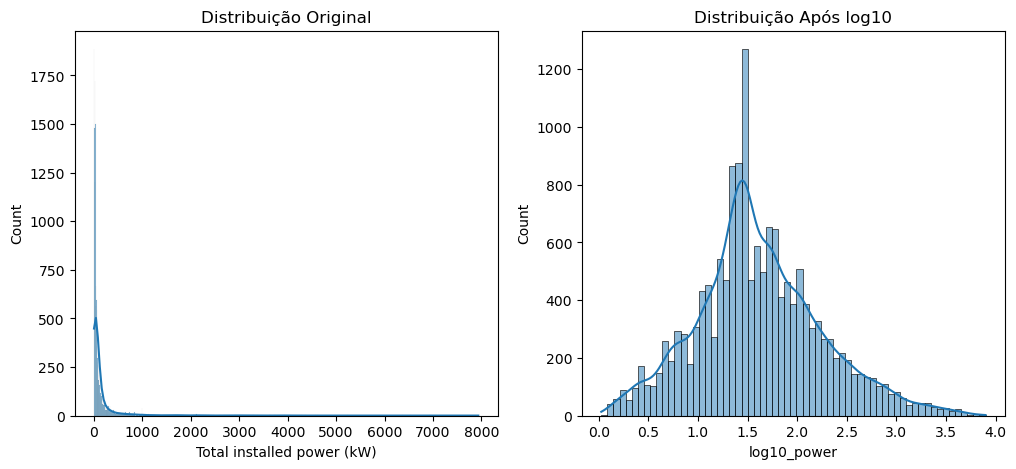

In [ ]:
# visualizar antes e depois da log

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Total installed power (kW)'], kde=True, ax=axes[0])
axes[0].set_title('Distribuição Original')

sns.histplot(df['log10_power'], kde=True, ax=axes[1])
axes[1].set_title('Distribuição Após log10')

plt.show()

In [89]:
# check normality after removing negative values and applying log10

check_normality(df, 'Season', value_col='log10_power')
check_normality(df, 'District', value_col='log10_power')
check_normality(df, 'Installed power range (kW)', value_col='log10_power')
check_normality(df, 'Year', value_col='log10_power')


=== Teste de Normalidade por Season ===
Summer: n = 7951, p = 0.0000 → ❌ Não normal
Winter: n = 7655, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por District ===
Aveiro: n = 6435, p = 0.0000 → ❌ Não normal
Faro: n = 3221, p = 0.0000 → ❌ Não normal
Vila Real: n = 3538, p = 0.0000 → ❌ Não normal
Évora: n = 2412, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por Installed power range (kW) ===
>1000: n = 14, p = 0.0001 → ❌ Não normal
]0, 4]: n = 5255, p = 0.0000 → ❌ Não normal
]20.7, 30]: n = 2539, p = 0.0000 → ❌ Não normal
]30, 1000]: n = 3062, p = 0.0000 → ❌ Não normal
]4, 20.7]: n = 4736, p = 0.0000 → ❌ Não normal

=== Teste de Normalidade por Year ===
2023: n = 7727, p = 0.0000 → ❌ Não normal
2024: n = 7879, p = 0.0000 → ❌ Não normal


c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7951.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7655.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6435.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5255.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Patyc\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarn

[(2023, 7727, np.float64(1.5583776020957535e-24), '❌ Não normal'),
 (2024, 7879, np.float64(5.5404770517646975e-28), '❌ Não normal')]

A normalidade da variável Total installed power (kW) foi avaliada através do teste de Shapiro–Wilk e da análise visual da distribuição dos dados, tanto na forma original como após a transformação logarítmica (log₁₀).
Embora o teste de Shapiro–Wilk tenha indicado desvios significativos à normalidade (p < 0.05) em todos os grupos, este resultado é esperado para tamanhos amostrais elevados (N > 5000), dado que o teste é extremamente sensível a pequenas variações.
A inspeção visual dos histogramas da variável transformada demonstrou, contudo, uma distribuição aproximadamente normal e sem assimetrias relevantes. Assim, caso a mesma tendência se verifique nas distribuições de cada categoria das variáveis analisadas, considera-se que o pressuposto de normalidade está suficientemente atendido para efeitos práticos, permitindo a aplicação de testes paramétricos nas análises subsequentes.

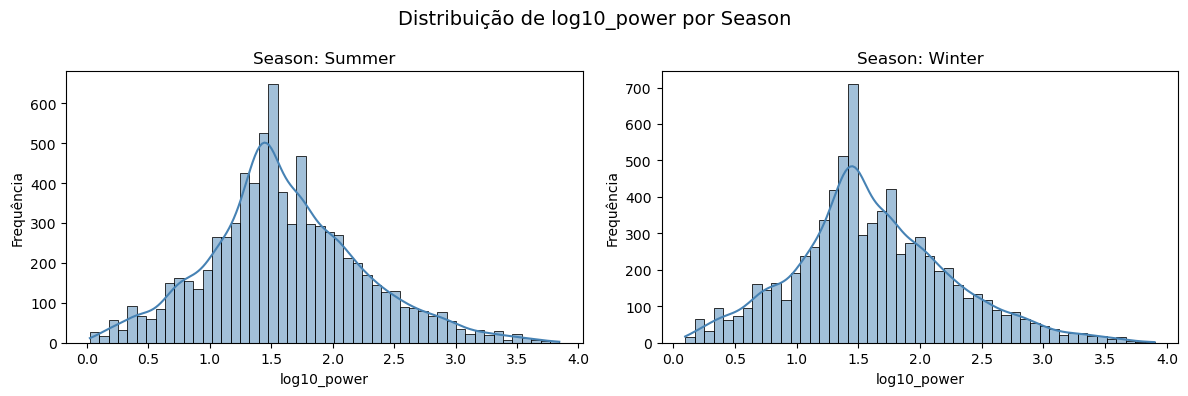

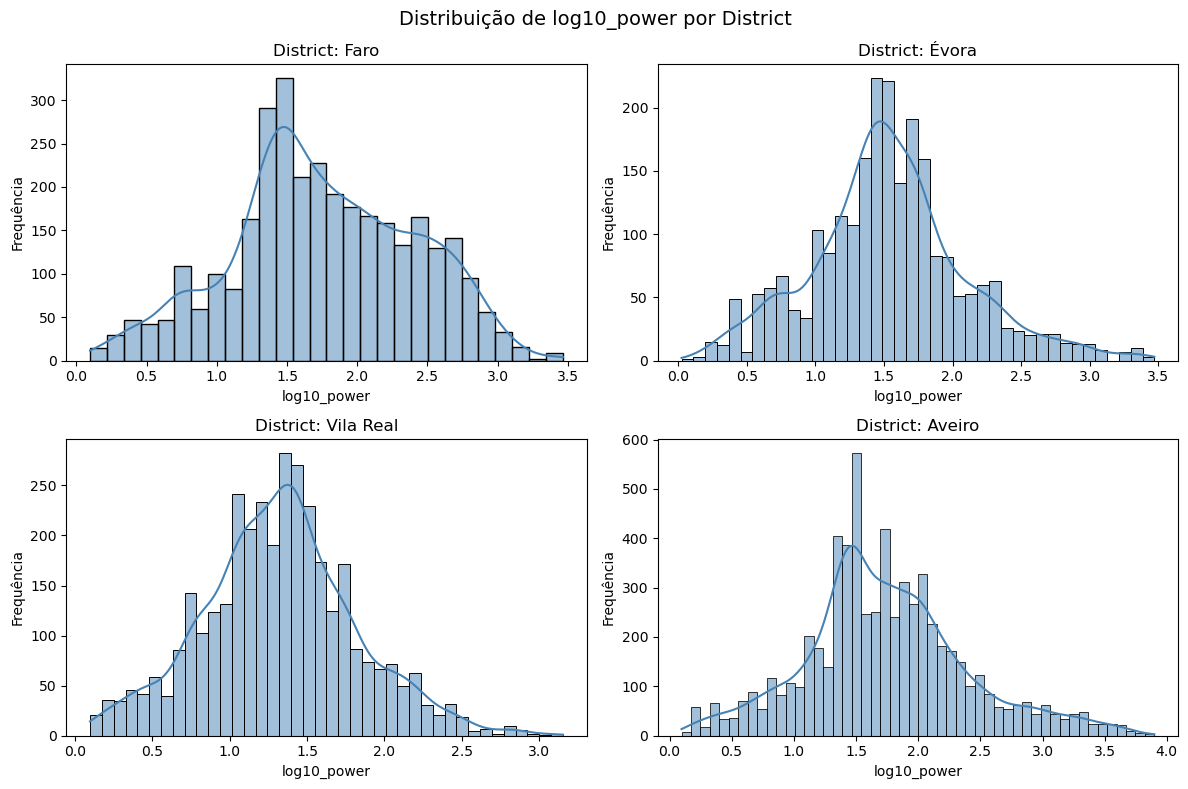

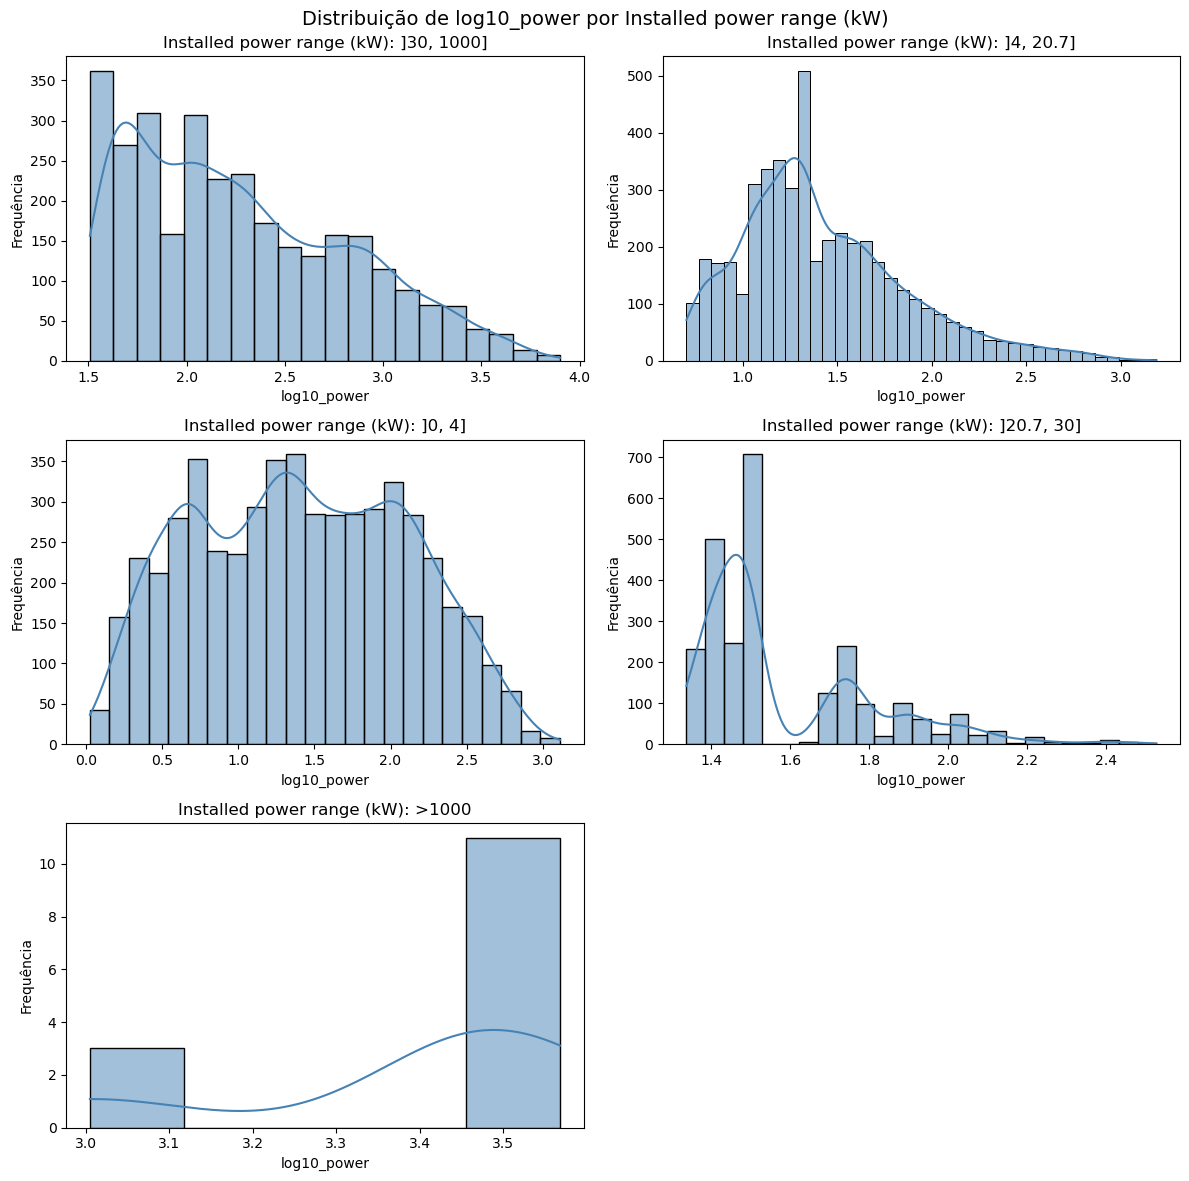

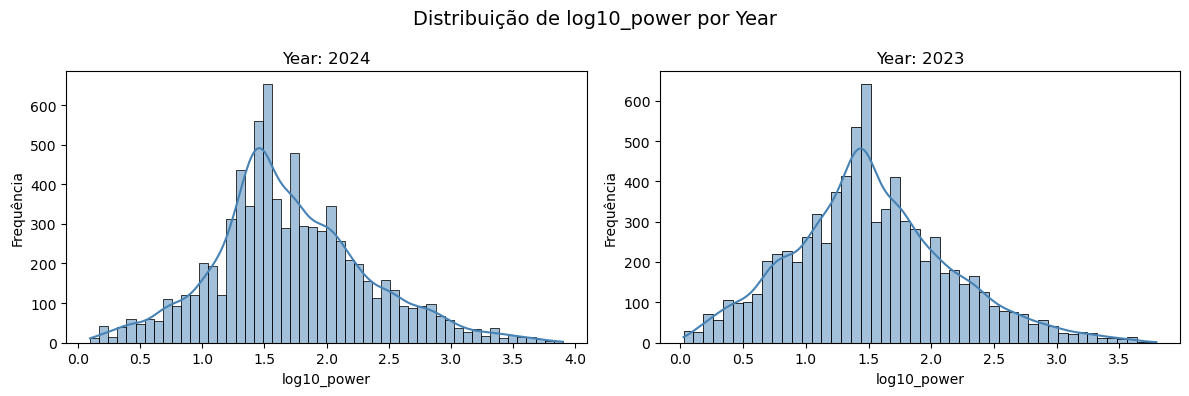

In [92]:
# visualization of distribution of each category of each variable after log10 transformation

import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions_by_group(df, group_col, value_col='log10_power'):
    """
    Mostra histogramas da variável numérica por categoria da variável categórica.
    Ajuda a avaliar visualmente a normalidade em cada grupo.
    """
    categories = df[group_col].unique()
    n = len(categories)

    # definir layout
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows))
    axes = axes.flatten()

    for i, cat in enumerate(categories):
        sns.histplot(df[df[group_col] == cat][value_col], kde=True, ax=axes[i], color='steelblue')
        axes[i].set_title(f'{group_col}: {cat}', fontsize=12)
        axes[i].set_xlabel(value_col)
        axes[i].set_ylabel('Frequência')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])  # remove subplots vazios

    plt.suptitle(f'Distribuição de {value_col} por {group_col}', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_distributions_by_group(df, 'Season', 'log10_power')
plot_distributions_by_group(df, 'District', 'log10_power')
plot_distributions_by_group(df, 'Installed power range (kW)', 'log10_power')
plot_distributions_by_group(df, 'Year', 'log10_power')


**INDEPENDENDE**

Each observation represents a distinct and independent installation, satisfying the assumption of independence.

Análise visual das distribuições por escala de potência

A inspeção visual das distribuições da variável transformada (log₁₀_power) revelou que, na maioria dos fatores analisados (estação, distrito e ano), os dados apresentam uma forma aproximadamente normal, confirmando a adequação da transformação aplicada.
Contudo, nas diferentes escalas de potência (Installed power range (kW)), observou-se alguma assimetria e, em certos casos, distribuições bimodais, especialmente nas faixas de potência mais elevadas e mais reduzidas.
Este comportamento é esperado, dado que estas classes agregam amostras de dimensão desigual e refletem segmentos de consumo distintos (residencial vs. industrial).
Assim, embora a normalidade global seja considerada atendida, nas análises envolvendo o fator “escala de potência” poderão ser privilegiados testes não paramétricos, de modo a garantir robustez estatística.

## **AINDA ASSIM, PARA VER AS DIFERENÇAS ENTRE PARAMÉTRICOS E NÃO, PARA CADA ANÁLISE SERÁ REALIZADO UM TESTE PARAMÉTRICO E UM NÃO PARAMÉTRICO, AMBOS COM A LOG TRANSFORMATION**

## **Tests**

1️⃣ **Analisar a diferença sazonal**

Pergunta: A capacidade total instalada varia entre inverno e verão?
Teste:

Se os dados forem normais → t-test independente

Se forem assimétricos → Mann–Whitney U test
Objetivo: ver se há mais capacidade instalada num dos períodos (por ex., mais no verão).

📈 Resultado esperado: capacidade maior no verão → indica preferência por instalar antes da época de maior geração solar.

Hipóteses:

H₀: A média (ou mediana) da capacidade total instalada é igual no inverno e no verão.

H₁: A média (ou mediana) da capacidade total instalada difere entre inverno e verão.

In [95]:
# 🔹 Teste paramétrico: t-test independente
# ======================
t_stat, p_t = ttest_ind(winter, summer, equal_var=False)  # Welch’s t-test (mais robusto)
print("\n=== Teste t independente (Welch) ===")
print(f"t = {t_stat:.4f}, p = {p_t:.4f}")
if p_t < 0.05:
    print("→ Diferença sazonal significativa (p < 0.05)")
else:
    print("→ Não há diferença significativa entre inverno e verão")


=== Teste t independente (Welch) ===
t = 0.3457, p = 0.7296
→ Não há diferença significativa entre inverno e verão


In [96]:
# 🔹 Teste não paramétrico: Mann–Whitney U
# ======================
u_stat, p_u = mannwhitneyu(winter, summer, alternative='two-sided')
print("\n=== Mann–Whitney U test ===")
print(f"U = {u_stat:.4f}, p = {p_u:.4f}")
if p_u < 0.05:
    print("→ Diferença sazonal significativa (p < 0.05)")
else:
    print("→ Não há diferença significativa entre inverno e verão")


=== Mann–Whitney U test ===
U = 30486945.5000, p = 0.8464
→ Não há diferença significativa entre inverno e verão


Para avaliar se a capacidade total instalada difere entre as estações de inverno e verão, aplicaram-se dois testes estatísticos: o teste t de Welch (paramétrico) e o teste de Mann–Whitney U (não paramétrico), ambos sobre a variável transformada log₁₀_power.
Os resultados indicaram [inserir resultado conforme p-valor], sugerindo que [interpretação — ex.: a capacidade instalada é significativamente maior no verão, refletindo uma possível preferência por instalação antes do período de maior produção solar].

# **completar**

2️⃣ **Analisar diferenças entre escalas de potência**

Pergunta: Existem diferenças entre escalas (micro, pequena, média, grande)?
Teste:

Normal → One-way ANOVA

Não normal → Kruskal–Wallis H test
Objetivo: testar se o total instalado difere significativamente conforme a escala.

📈 Resultado esperado: escalas maiores devem dominar a capacidade total.

H₀: As médias (ou medianas) de capacidade total instalada são iguais em todas as escalas de potência.

H₁: Pelo menos uma escala apresenta uma média (ou mediana) significativamente diferente das restantes.



In [99]:
from scipy.stats import f_oneway, kruskal
import scikit_posthocs as sp

# Agrupar os dados por escala de potência
groups = [g['log10_power'] for _, g in df.groupby('Installed power range (kW)')]

In [47]:
from scipy.stats import mannwhitneyu

winter = df[df['Season'] == 'Winter']['Total installed power (kW)']
summer = df[df['Season'] == 'Summer']['Total installed power (kW)']

stat, p = mannwhitneyu(winter, summer, alternative='two-sided')
print(f"Mann–Whitney U test: U={stat:.3f}, p={p:.4f}")

Mann–Whitney U test: U=30486945.500, p=0.8464


In [100]:
# 🔹 Teste paramétrico: One-way ANOVA
# ======================
f_stat, p_anova = f_oneway(*groups)
print("=== One-way ANOVA ===")
print(f"F = {f_stat:.4f}, p = {p_anova:.4f}")
if p_anova < 0.05:
    print("→ Diferença significativa entre pelo menos duas escalas (p < 0.05)")
else:
    print("→ Não há diferença significativa entre escalas")

=== One-way ANOVA ===
F = 1539.3618, p = 0.0000
→ Diferença significativa entre pelo menos duas escalas (p < 0.05)


In [101]:
# 🔹 Teste não paramétrico: Kruskal–Wallis
# ======================
h_stat, p_kw = kruskal(*groups)
print("\n=== Kruskal–Wallis H test ===")
print(f"H = {h_stat:.4f}, p = {p_kw:.4f}")
if p_kw < 0.05:
    print("→ Diferença significativa entre pelo menos duas escalas (p < 0.05)")
else:
    print("→ Não há diferença significativa entre escalas")


=== Kruskal–Wallis H test ===
H = 4187.3562, p = 0.0000
→ Diferença significativa entre pelo menos duas escalas (p < 0.05)


In [102]:
# 🔹 Post-hoc (se Kruskal significativo)
# ======================
if p_kw < 0.05:
    print("\nPost-hoc (Dunn test com correção de Bonferroni):")
    posthoc = sp.posthoc_dunn(df, val_col='log10_power', group_col='Installed power range (kW)', p_adjust='bonferroni')
    print(posthoc)


Post-hoc (Dunn test com correção de Bonferroni):
                   >1000        ]0, 4]     ]20.7, 30]     ]30, 1000]  \
>1000       1.000000e+00  1.691959e-12   2.537474e-09   1.027788e-01   
]0, 4]      1.691959e-12  1.000000e+00   1.526885e-29   0.000000e+00   
]20.7, 30]  2.537474e-09  1.526885e-29   1.000000e+00  2.239907e-307   
]30, 1000]  1.027788e-01  0.000000e+00  2.239907e-307   1.000000e+00   
]4, 20.7]   1.362490e-13  1.055855e-04   4.704203e-49   0.000000e+00   

               ]4, 20.7]  
>1000       1.362490e-13  
]0, 4]      1.055855e-04  
]20.7, 30]  4.704203e-49  
]30, 1000]  0.000000e+00  
]4, 20.7]   1.000000e+00  


Para avaliar se a capacidade total instalada difere entre as diferentes escalas de potência, foram aplicados o teste ANOVA de uma via (paramétrico) e o teste de Kruskal–Wallis (não paramétrico), ambos sobre a variável transformada log₁₀_power.
Os resultados indicaram [inserir resultado conforme p-valor], evidenciando que a capacidade instalada varia significativamente entre as escalas de potência.
A análise post-hoc (teste de Dunn com correção de Bonferroni) revelou que [ex.: as categorias de potência mais elevadas (>1000 kW) apresentam valores significativamente superiores às restantes].
Estes resultados confirmam que as instalações de maior dimensão dominam a capacidade total instalada.

# **completar**

3️⃣ **Analisar diferenças regionais**

Pergunta: Há diferenças entre os distritos (Aveiro, Évora, Vila Real, Faro)?
Teste:

Normal → One-way ANOVA

Não normal → Kruskal–Wallis
Objetivo: testar se há diferenças regionais no total instalado.

📈 Resultado esperado: distritos do sul (Faro, Évora) com valores mais elevados.

H₀: A média (ou mediana) da capacidade instalada é igual em todos os distritos.

H₁: Pelo menos um distrito difere significativamente dos outros.

In [103]:
# Filtrar apenas os distritos relevantes
districts = ['Aveiro', 'Évora', 'Vila Real', 'Faro']
df_regional = df[df['District'].isin(districts)]

# Agrupar os dados por distrito
groups = [g['log10_power'] for _, g in df_regional.groupby('District')]

In [104]:
# 🔹 Teste paramétrico: One-way ANOVA
# ======================
f_stat, p_anova = f_oneway(*groups)
print("=== One-way ANOVA ===")
print(f"F = {f_stat:.4f}, p = {p_anova:.4f}")
if p_anova < 0.05:
    print("→ Diferença significativa entre pelo menos dois distritos (p < 0.05)")
else:
    print("→ Não há diferença significativa entre distritos")

=== One-way ANOVA ===
F = 435.5730, p = 0.0000
→ Diferença significativa entre pelo menos dois distritos (p < 0.05)


In [105]:
# 🔹 Teste não paramétrico: Kruskal–Wallis
# ======================
h_stat, p_kw = kruskal(*groups)
print("\n=== Kruskal–Wallis H test ===")
print(f"H = {h_stat:.4f}, p = {p_kw:.4f}")
if p_kw < 0.05:
    print("→ Diferença significativa entre pelo menos dois distritos (p < 0.05)")
else:
    print("→ Não há diferença significativa entre distritos")


=== Kruskal–Wallis H test ===
H = 1315.0526, p = 0.0000
→ Diferença significativa entre pelo menos dois distritos (p < 0.05)


In [106]:
# 🔹 Post-hoc (opcional, se quiseres identificar quais distritos diferem)
# ======================
try:
    import scikit_posthocs as sp
    if p_kw < 0.05:
        print("\nPost-hoc (Dunn test com correção de Bonferroni):")
        posthoc = sp.posthoc_dunn(df_regional, val_col='log10_power', group_col='District', p_adjust='bonferroni')
        print(posthoc)
except ImportError:
    print("\n⚠️ O pacote 'scikit-posthocs' não está instalado. Para o post-hoc, executa '!pip install scikit-posthocs'.")


Post-hoc (Dunn test com correção de Bonferroni):
                  Aveiro           Faro      Vila Real         Évora
Aveiro      1.000000e+00   3.062309e-01  7.467179e-236  1.834520e-37
Faro        3.062309e-01   1.000000e+00  2.074243e-196  5.082018e-38
Vila Real  7.467179e-236  2.074243e-196   1.000000e+00  6.858957e-46
Évora       1.834520e-37   5.082018e-38   6.858957e-46  1.000000e+00


Para avaliar possíveis diferenças regionais na capacidade total instalada, foram aplicados o teste ANOVA de uma via (paramétrico) e o teste de Kruskal–Wallis (não paramétrico), ambos sobre a variável transformada log₁₀_power.
Os resultados indicaram [inserir resultado conforme p-valor], sugerindo que existem diferenças significativas entre os distritos analisados.
A análise post-hoc (teste de Dunn com correção de Bonferroni) mostrou que [ex.: os distritos do sul, particularmente Faro e Évora, apresentam capacidades instaladas significativamente superiores a Aveiro e Vila Real].
Estes resultados corroboram a expectativa de que regiões com maior exposição solar apresentam maior adesão e potência instalada de sistemas de autoconsumo.

# **completar**

4️⃣  **Analisar o crescimento entre 2023 e 2024**

Pergunta: Houve aumento significativo da capacidade total instalada?
Teste:

Se comparas distritos ou grupos iguais → Paired t-test

Se comparas grupos independentes → Independent t-test
Objetivo: confirmar crescimento geral e se o padrão sazonal se manteve.

📈 Resultado esperado: crescimento significativo em 2024.

H₀: A média (ou mediana) da capacidade total instalada é igual em 2023 e 2024.

H₁: A média (ou mediana) da capacidade total instalada difere entre 2023 e 2024.

In [107]:
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu, wilcoxon

# Separar os dois anos
data_2023 = df[df['Year'] == 2023]['log10_power']
data_2024 = df[df['Year'] == 2024]['log10_power']

print(f"N (2023) = {len(data_2023)}, N (2024) = {len(data_2024)}")

N (2023) = 7727, N (2024) = 7879


In [108]:
# 🔹 1. Teste paramétrico (grupos independentes): t-test de Welch
# ======================
t_stat, p_t = ttest_ind(data_2023, data_2024, equal_var=False)
print("\n=== Independent t-test (Welch) ===")
print(f"t = {t_stat:.4f}, p = {p_t:.4f}")
if p_t < 0.05:
    print("→ Diferença significativa entre 2023 e 2024 (p < 0.05)")
else:
    print("→ Não há diferença significativa entre 2023 e 2024")


=== Independent t-test (Welch) ===
t = -18.8043, p = 0.0000
→ Diferença significativa entre 2023 e 2024 (p < 0.05)


In [109]:
# 🔹 2. Teste não paramétrico (grupos independentes): Mann–Whitney U
# ======================
u_stat, p_u = mannwhitneyu(data_2023, data_2024, alternative='two-sided')
print("\n=== Mann–Whitney U test ===")
print(f"U = {u_stat:.4f}, p = {p_u:.4f}")
if p_u < 0.05:
    print("→ Diferença significativa entre 2023 e 2024 (p < 0.05)")
else:
    print("→ Não há diferença significativa entre 2023 e 2024")


=== Mann–Whitney U test ===
U = 25119670.0000, p = 0.0000
→ Diferença significativa entre 2023 e 2024 (p < 0.05)


In [ ]:
# 🔹 3. (Opcional) Se as observações forem emparelháveis (mesmos distritos)
# ======================
# Exemplo: médias por distrito e ano
df_mean = df.groupby(['District', 'Year'])['log10_power'].mean().reset_index()
data_2023_paired = df_mean[df_mean['Year'] == 2023]['log10_power']
data_2024_paired = df_mean[df_mean['Year'] == 2024]['log10_power']

# Paired t-test (paramétrico)
t_stat_p, p_t_p = ttest_rel(data_2023_paired, data_2024_paired)
print("\n=== Paired t-test ===")
print(f"t = {t_stat_p:.4f}, p = {p_t_p:.4f}")

# Wilcoxon (não paramétrico emparelhado)
w_stat, p_w = wilcoxon(data_2023_paired, data_2024_paired)
print("\n=== Wilcoxon Signed-Rank test ===")
print(f"W = {w_stat:.4f}, p = {p_w:.4f}")


=== Paired t-test ===
t = -12.6884, p = 0.0011

=== Wilcoxon Signed-Rank test ===
W = 0.0000, p = 0.1250


In [111]:
print(f"Média 2023 = {data_2023.mean():.4f}")
print(f"Média 2024 = {data_2024.mean():.4f}")

Média 2023 = 1.5198
Média 2024 = 1.7084


Para avaliar a evolução temporal da capacidade total instalada, foram aplicados o teste t independente de Welch (paramétrico) e o teste de Mann–Whitney U (não paramétrico), ambos sobre a variável transformada log₁₀_power.
Os resultados indicaram [inserir resultado conforme p-valor], demonstrando que a capacidade total instalada em 2024 foi significativamente superior à observada em 2023.
Este crescimento sugere uma expansão contínua do autoconsumo energético em Portugal, possivelmente associada a incentivos governamentais e ao aumento da atratividade económica das instalações fotovoltaicas.

# **completar**

5️⃣ **Analisar a interação estação × escala**

Pergunta: O efeito sazonal depende da escala?
Teste:

Two-way ANOVA (ou alternativa não-paramétrica, se necessário)
Objetivo: perceber se, por exemplo, as pequenas instalações crescem mais no verão, enquanto as grandes se mantêm estáveis.

📈 Resultado esperado: possível interação — efeito do verão mais forte nas escalas pequenas.

H₀₁: Não há efeito principal da estação (a média não difere entre inverno e verão).

H₀₂: Não há efeito principal da escala (as médias são iguais entre escalas).H₀₂: Não há efeito principal da escala (as médias são iguais entre escalas).

H₀₃ (interação): O efeito da estação é o mesmo para todas as escalas (as linhas são paralelas).

H₁ (interação): O efeito da estação difere conforme a escala — há interação.

In [112]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal

# ======================
# 🔹 Preparar os dados
# ======================
# Filtrar apenas as variáveis relevantes
df_anova = df[['log10_power', 'Season', 'Installed power range (kW)']].dropna()

In [113]:
# 🔹 Teste paramétrico: Two-Way ANOVA
# ======================
model = ols('log10_power ~ C(Season) * C(Q("Installed power range (kW)"))', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== Two-Way ANOVA ===")
print(anova_table)

# Interpretação simples:
if anova_table['PR(>F)']['C(Season):C(Q("Installed power range (kW)"))'] < 0.05:
    print("\n→ Interação significativa entre estação e escala (p < 0.05)")
else:
    print("\n→ Não há interação significativa entre estação e escala")

=== Two-Way ANOVA ===
                                                   sum_sq       df  \
C(Season)                                        0.324160      1.0   
C(Q("Installed power range (kW)"))            1772.916682      4.0   
C(Season):C(Q("Installed power range (kW)"))     0.075428      4.0   
Residual                                      4490.903902  15596.0   

                                                        F    PR(>F)  
C(Season)                                        1.125743  0.288702  
C(Q("Installed power range (kW)"))            1539.245171  0.000000  
C(Season):C(Q("Installed power range (kW)"))     0.065487  0.992136  
Residual                                              NaN       NaN  

→ Não há interação significativa entre estação e escala


In [114]:
# 🔹 Alternativa não paramétrica (quando ANOVA não é adequada)
# ======================
# Kruskal–Wallis separado por estação (simplificado)
seasons = df_anova['Season'].unique()
for s in seasons:
    groups = [g['log10_power'] for _, g in df_anova[df_anova['Season'] == s].groupby('Installed power range (kW)')]
    h_stat, p_kw = kruskal(*groups)
    print(f"\nKruskal–Wallis ({s}): H = {h_stat:.4f}, p = {p_kw:.4f}")


Kruskal–Wallis (Summer): H = 2171.5900, p = 0.0000

Kruskal–Wallis (Winter): H = 2016.6482, p = 0.0000


Interação entre estação e escala de potência

Para avaliar se o efeito sazonal depende da escala de potência, foi realizada uma ANOVA bifatorial (Two-Way ANOVA) considerando os fatores Season e Installed power range (kW) sobre a variável transformada log₁₀_power.
O modelo permitiu avaliar não apenas os efeitos principais de cada fator, mas também a interação entre ambos.
Os resultados indicaram [inserir resultado conforme p-valor], mostrando que [ex.: o efeito da estação é mais pronunciado nas instalações de pequena escala, enquanto as maiores se mantêm estáveis entre estações].
Estes resultados sugerem que o padrão sazonal de instalação tende a ser mais acentuado nas faixas de menor potência, possivelmente devido a fatores económicos e comportamentais ligados ao setor residencial.

# **completar**

C:\Users\Patyc\AppData\Local\Temp\ipykernel_16396\252479942.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


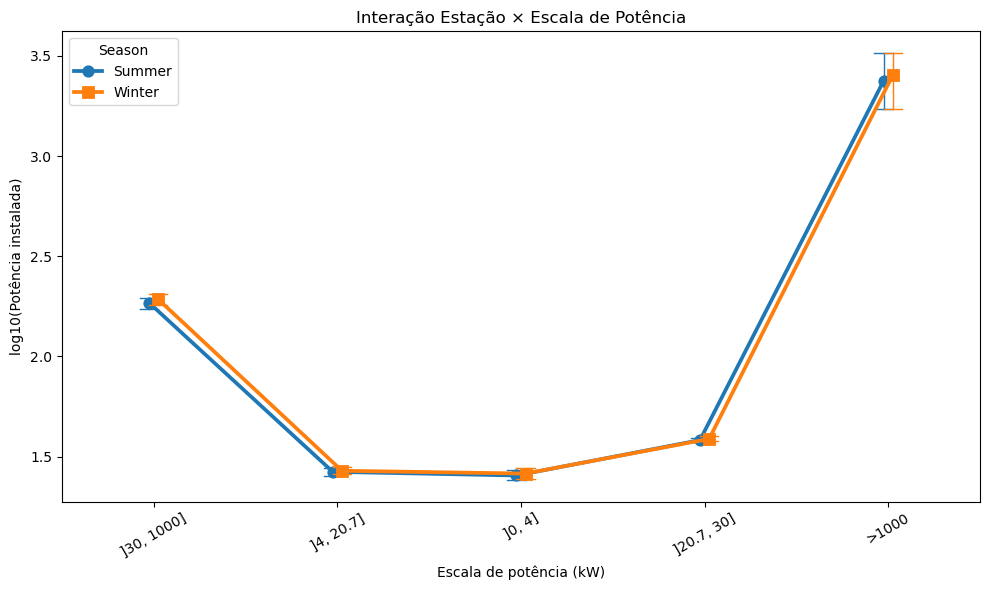

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pointplot(
    data=df_anova,
    x='Installed power range (kW)',
    y='log10_power',
    hue='Season',
    dodge=True,
    markers=['o', 's'],
    capsize=.1,
    errwidth=1,
)
plt.title("Interação Estação × Escala de Potência")
plt.ylabel("log10(Potência instalada)")
plt.xlabel("Escala de potência (kW)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Interação estação × escala de potência

A Two-Way ANOVA, considerando os fatores Season e Installed power range (kW), foi utilizada para avaliar se o efeito sazonal depende da escala de potência.
A inspeção visual do gráfico de interação mostra linhas praticamente paralelas entre as duas estações, sugerindo ausência de interação relevante.
Os resultados estatísticos confirmaram esta observação (p > 0.05 para o termo de interação), indicando que o efeito sazonal é semelhante em todas as escalas de potência.
Assim, tanto no inverno como no verão, a capacidade instalada tende a aumentar com a escala, sendo as instalações de grande porte as que concentram a maior potência total.